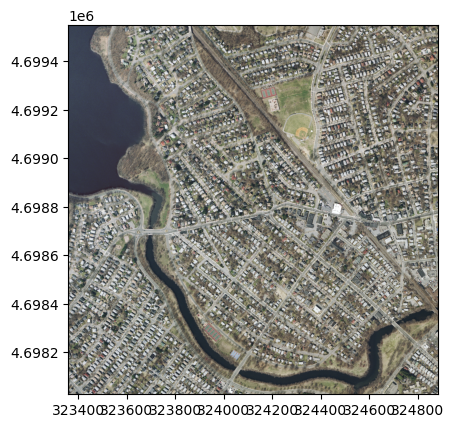

<Axes: >

In [1]:
import rasterio
from rasterio.plot import show
from PIL import Image
img = rasterio.open("C:\\Users\\saim\\Downloads\\Boston\\Boston\\i9.tif")
show(img)

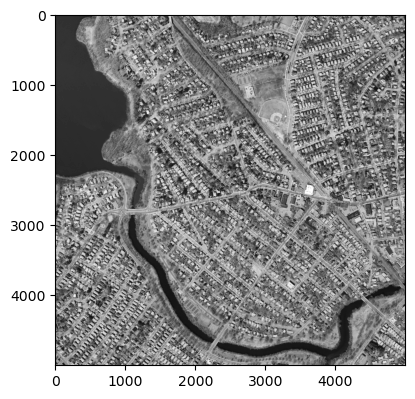

In [2]:
#Reading Multiple Bands
import matplotlib.pyplot as plt
img_band1 = img.read(1)
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(img_band1, cmap='gray')
plt.show()

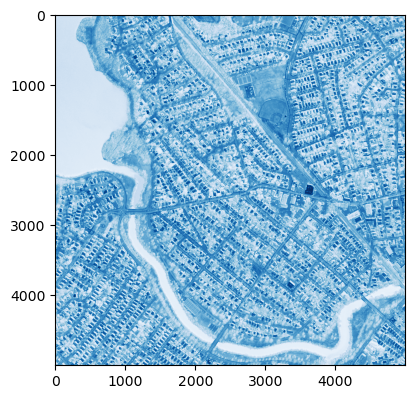

In [3]:
import matplotlib.pyplot as plt
img_band2 = img.read(2)
fig2 = plt.figure(figsize=(10, 10))
ax2 = fig2.add_subplot(2, 2, 2)
ax2.imshow(img_band2, cmap='Blues')
plt.show()

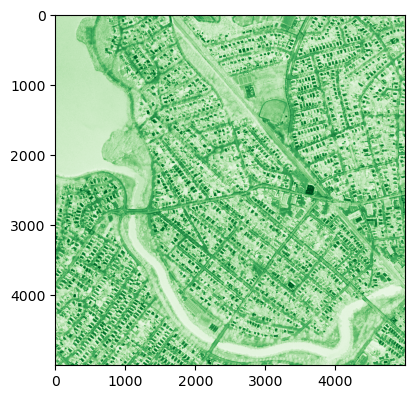

In [4]:
import matplotlib.pyplot as plt
img_band3 = img.read(3)
fig3 = plt.figure(figsize=(10, 10))
ax3 = fig3.add_subplot(2, 2, 3)
ax3.imshow(img_band3, cmap='Greens')
plt.show()

In [5]:
import rasterio

with rasterio.open("C:\\Users\\saim\\Downloads\\Boston\\Boston\\i9.tif") as dataset:
    width = dataset.width
    height = dataset.height
    print("Image Size (Width x Height):", width, "x", height)
    num_bands = dataset.count
    print("Number of Bands:", num_bands)

Image Size (Width x Height): 5000 x 5000
Number of Bands: 3


In [6]:
img.crs

CRS.from_epsg(32619)

In [7]:
metadata=img.meta
print("metadata", metadata)

metadata {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 5000, 'height': 5000, 'count': 3, 'crs': CRS.from_epsg(32619), 'transform': Affine(0.30480061, 0.0, 323359.918719837,
       0.0, -0.30480061, 4699549.911099824)}


In [8]:
desc=img.descriptions
print("Raster Decription: {desc}\n".format(desc=desc))

Raster Decription: ('Band_1', 'Band_2', 'Band_3')



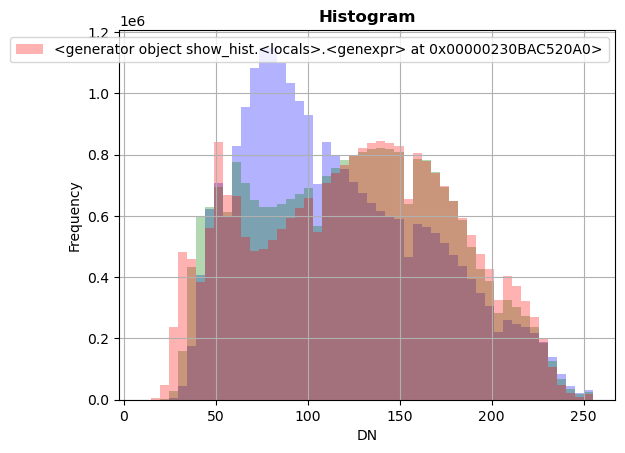

In [9]:
# Plot Pixel Value Histogram In Each Band. 
rasterio.plot.show_hist(img, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3)

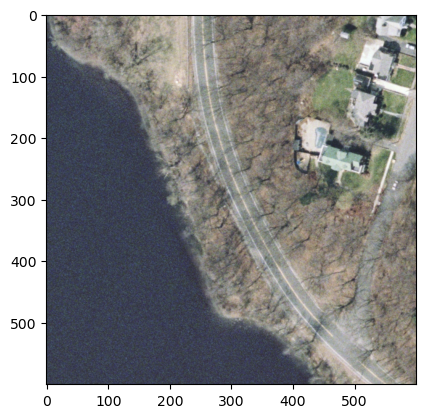

In [10]:
#Clipping
import rasterio
import matplotlib.pyplot as plt

with rasterio.open("C:\\Users\\saim\\Downloads\\Boston\\Boston\\i9.tif", 'r') as src:
    img = src.read()
clipped_img = img[:, 300:900, 300:900]

plt.imshow(clipped_img.transpose(1, 2, 0))
plt.show()

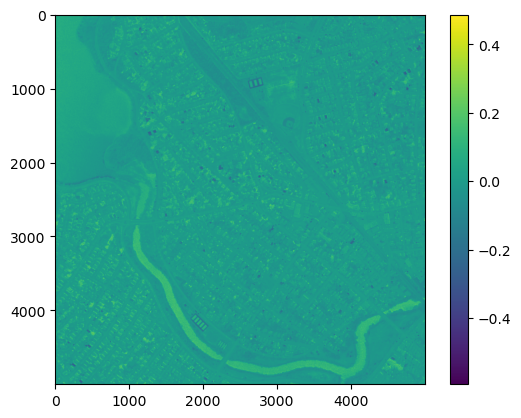

In [11]:
#Calculating NDVI Or Desired Parameters
red_clipped = img[0].astype('f4')
nir_clipped = img[1].astype('f4')
ndvi_clipped = (nir_clipped - red_clipped) / (nir_clipped + red_clipped)
import numpy as np
ndvi_clipped2 = np.divide(np.subtract(nir_clipped, red_clipped), np.add(nir_clipped, red_clipped))
ndvi_clipped3 = np.nan_to_num(ndvi_clipped2, nan=-1)
plt.imshow(ndvi_clipped3, cmap='viridis')
plt.colorbar()